In [107]:
import os
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from tsfresh import select_features
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.feature_extraction import EfficientFCParameters

import torch
import torch.nn as nn
from tqdm import tqdm

In [2]:
train_set = pd.read_csv("project2_TS_input/ptbdb_train.csv", header=None)
test_set = pd.read_csv("project2_TS_input/ptbdb_test.csv", header=None)

# 1. Exploratory Data Analysis 

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.730599,0.472859,0.139526,0.000000,0.020507,0.112183,0.162847,0.180941,0.192199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.152446,0.011377,0.308305,0.153584,0.096701,0.083049,0.086462,0.105802,0.071672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.975917,0.693234,0.241399,0.107225,0.098050,0.072248,0.062500,0.054472,0.054472,0.045872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.952505,0.587508,0.115810,0.072869,0.003904,0.025374,0.020169,0.020169,0.021470,0.014314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.994152,0.525666,0.248213,0.070825,0.152047,0.258609,0.315789,0.346979,0.352827,0.348928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
train_set.shape

(11641, 188)

In [5]:
test_set.shape

(2911, 188)

In [6]:
y_train=train_set.iloc[:,-1]
X_train = train_set.iloc[:,:-1]
y_test=test_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]

### Labels distribution

<AxesSubplot:>

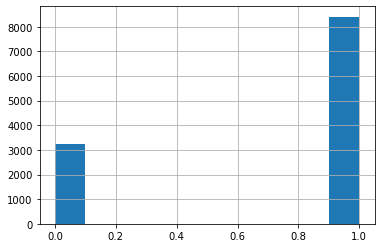

In [30]:
y_train.hist()

<AxesSubplot:>

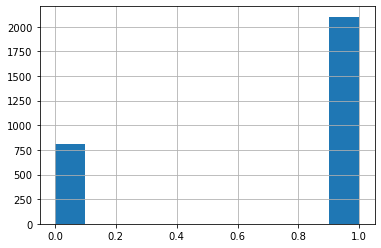

In [31]:
y_test.hist()

### Plotting ECGs

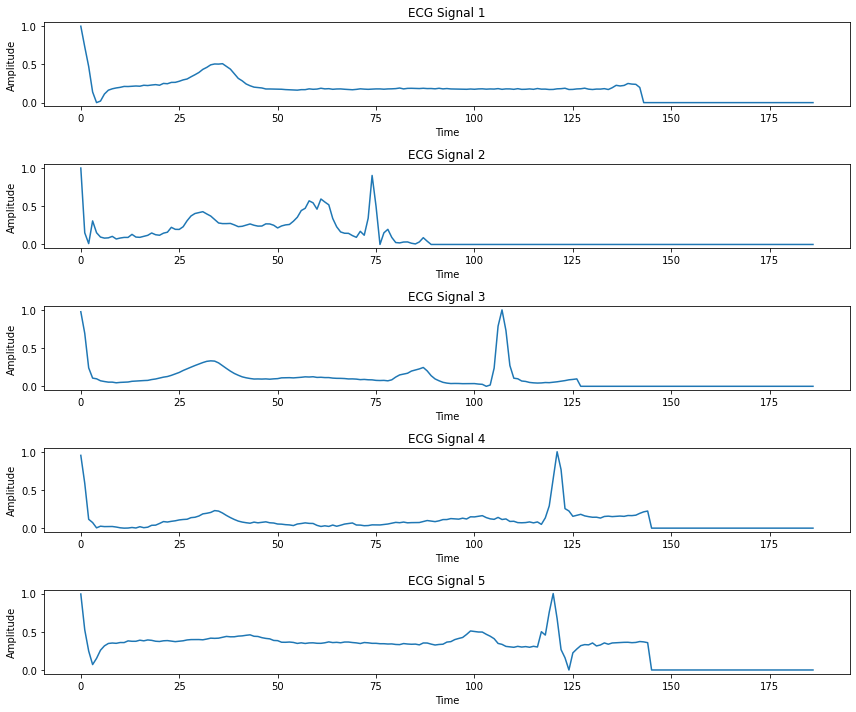

In [32]:
fig, axs = plt.subplots(5, figsize=(12, 10))

# Iterate through the first 5 ECG signals
for i in range(5):
    # Plot the ECG signal on the corresponding subplot
    axs[i].plot(X_train.iloc[i,:])

    # Add title and labels for each subplot
    axs[i].set_title(f'ECG Signal {i + 1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

We can use accuracy, f1 score, AUC

# 2. Classic Machine learning methods

## Training on raw data

### Logistic regression

/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       809
         1.0       0.85      0.92      0.88      2102

    accuracy                           0.82      2911
   macro avg       0.79      0.75      0.76      2911
weighted avg       0.82      0.82      0.82      2911

F1:  0.8813559322033898
Accuracy: 0.8221


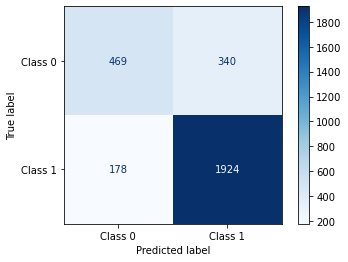

In [8]:
# Define the logistic regression model
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)
    
y_pred = log_reg.predict(X_test)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            display_labels=['Class 0', 'Class 1'], 
                                            cmap='Blues', 
                                            normalize=None)
 
print(classification_report(y_test, y_pred))
print("F1: ",f1_score(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

### Random Forest

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       809
         1.0       0.97      0.99      0.98      2102

    accuracy                           0.97      2911
   macro avg       0.97      0.95      0.96      2911
weighted avg       0.97      0.97      0.97      2911

F1:  0.9790143834001415
Accuracy: 0.9694


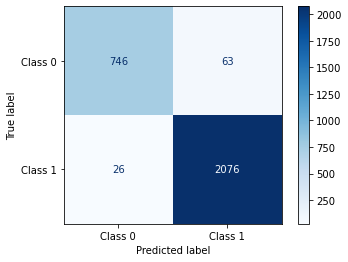

In [9]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
    
y_pred = rf.predict(X_test)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            display_labels=['Class 0', 'Class 1'], 
                                            cmap='Blues', 
                                            normalize=None)
 
print(classification_report(y_test, y_pred))
print("F1: ",f1_score(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

### SVM

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       809
         1.0       0.93      0.95      0.94      2102

    accuracy                           0.91      2911
   macro avg       0.89      0.88      0.89      2911
weighted avg       0.91      0.91      0.91      2911

F1:  0.9384869196323355
Accuracy: 0.9103


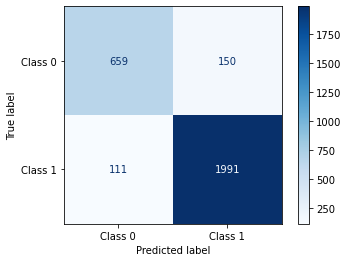

In [10]:
svm = SVC(random_state=42)

svm.fit(X_train, y_train)
    
y_pred = svm.predict(X_test)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            display_labels=['Class 0', 'Class 1'], 
                                            cmap='Blues', 
                                            normalize=None)
 
print(classification_report(y_test, y_pred))
print("F1: ",f1_score(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

## Adding new features with tsfresh

### extracting features from X_train and X_test

In [ ]:
df=X_train.copy()

df = df.reset_index()

# Rename the 'index' column to 'id'
df = df.rename(columns={'index': 'id'})

# Transform the data frame using the 'melt' function
new_df = pd.melt(
    df,
    id_vars=['id'],  # The 'id' column that corresponds to the row index of the original data frame
    var_name='time',  # The new column name for the time steps
    value_name='value'  # The new column name for the measurement values
)

# Ensure that 'time' column has numeric values
new_df['time'] = pd.to_numeric(new_df['time'])

new_df = new_df.sort_values(by=['id', 'time'])
new_df

In [ ]:
# Extract features
extracted_features = extract_features(new_df, column_id='id', column_sort='time')

# Impute missing values
impute(extracted_features)

# Selecting important features
important_features = select_features(extracted_features, y_train)

In [ ]:
df=X_test.copy()

df = df.reset_index()

# Rename the 'index' column to 'id'
df = df.rename(columns={'index': 'id'})

# Transform the data frame using the 'melt' function
new_df_test = pd.melt(
    df,
    id_vars=['id'],  # The 'id' column that corresponds to the row index of the original data frame
    var_name='time',  # The new column name for the time steps
    value_name='value'  # The new column name for the measurement values
)

# Ensure that 'time' column has numeric values
new_df_test['time'] = pd.to_numeric(new_df_test['time'])

new_df_test = new_df_test.sort_values(by=['id', 'time'])

In [ ]:
# Extract features from new_df_test and select only the important features based on the training data
extracted_features_test = extract_features(new_df_test, column_id='id', column_sort='time')
important_features_test = extracted_features_test[important_features.columns]

# Impute missing values
impute(important_features_test)

In [ ]:
# Save the important_features data frame as a CSV file
important_features.to_csv('important_features.csv', index=False)
important_features_test.to_csv('important_features_test.csv', index=False)

In [13]:
important_features = pd.read_csv("important_features.csv")
important_features_test = pd.read_csv("important_features_test.csv")

### Train models on train set completed with selected features

In [16]:
# Merge the extracted features with original data frame (X_train)
X_train_with_tsfresh = pd.concat([X_train, important_features], axis=1)
X_test_with_tsfresh = pd.concat([X_test, important_features_test], axis=1)

/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       809
         1.0       0.91      0.94      0.92      2102

    accuracy                           0.89      2911
   macro avg       0.87      0.85      0.86      2911
weighted avg       0.89      0.89      0.89      2911

F1:  0.9248120300751879
Accuracy: 0.8901


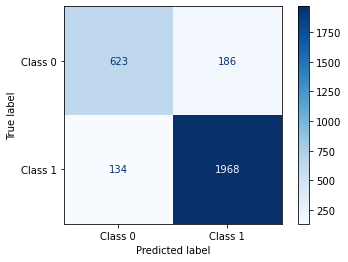

In [35]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_with_tsfresh, y_train)
    
y_pred = log_reg.predict(X_test_with_tsfresh)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            display_labels=['Class 0', 'Class 1'], 
                                            cmap='Blues', 
                                            normalize=None)
 
print(classification_report(y_test, y_pred))
print("F1: ",f1_score(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       809
         1.0       0.98      1.00      0.99      2102

    accuracy                           0.98      2911
   macro avg       0.98      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911

F1:  0.9863272041489862
Accuracy: 0.9801


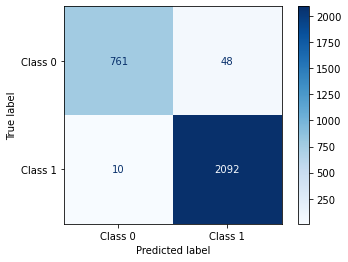

In [17]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_with_tsfresh, y_train)
    
y_pred = rf.predict(X_test_with_tsfresh)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            display_labels=['Class 0', 'Class 1'], 
                                            cmap='Blues', 
                                            normalize=None)
 
print(classification_report(y_test, y_pred))
print("F1: ",f1_score(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/evasarlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       809
         1.0       0.89      0.94      0.91      2102

    accuracy                           0.87      2911
   macro avg       0.86      0.81      0.83      2911
weighted avg       0.87      0.87      0.87      2911

F1:  0.9145751784480773
Accuracy: 0.8726


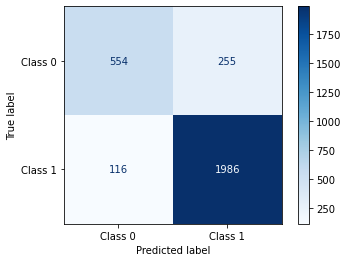

In [18]:
svm = SVC(random_state=42)

svm.fit(X_train_with_tsfresh, y_train)
    
y_pred = svm.predict(X_test_with_tsfresh)

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                            display_labels=['Class 0', 'Class 1'], 
                                            cmap='Blues', 
                                            normalize=None)
 
print(classification_report(y_test, y_pred))
print("F1: ",f1_score(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')